In [14]:
from logging import basicConfig
from sys import stdout
basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                    level='DEBUG', stream=stdout)

In [15]:
from pybayesx import *

In [16]:
snapshot_id = 91
halo_id = 0
test_id = f'tng300s{snapshot_id}h{halo_id}-1'
bin_size = 24

In [17]:
evts_path = f"data/tng/tng_s{snapshot_id}_h{halo_id}_obs_evt.fits"
bg_path = f"data/tng/tng_s{snapshot_id}_h{halo_id}_bg.fits"

# mask_path = "data/4361_manual3_rawdata/wavdetect.reg"
# sky_path = "data/4361_manual3_rawdata/sky.reg"
out_path = f"data/{test_id}"

In [18]:
from soxs.instrument_registry import instrument_registry
from soxs.utils import get_data_file

instrument_spec = instrument_registry['chandra_acisi_cy0']

arf_path = get_data_file(instrument_spec["arf"])
rmf_path = get_data_file(instrument_spec["rmf"])

In [19]:
coords = [1400, 1400, 1900, 1900]

In [20]:
evts = Events.load_fits(evts_path, False, exposure_time=300e3)
bg = Events.load_fits(bg_path, True, exposure_time=300e3)
arf = ARF.load_fits(arf_path)
rmf = RMF.load_fits(rmf_path)
# mask_bounds = (coords[0] - coords[2] / 2, coords[0] + coords[2] / 2, coords[1] - coords[3] / 2, coords[1] + coords[3] / 2)
# print(f"Mask bounds: {mask_bounds}")
# mask = Mask.load_reg(mask_path, *mask_bounds)

2023-05-08 19:31:45,701 | INFO : Detected energy range 0.24821424865722655:11.3298095703125 keV
2023-05-08 19:31:45,702 | INFO : Rounded energy range to 0.24:11.33 keV
2023-05-08 19:31:45,702 | INFO : Events loading complete
2023-05-08 19:31:45,731 | INFO : Detected energy range 0.24866026306152345:11.217779296875 keV
2023-05-08 19:31:45,732 | INFO : Rounded energy range to 0.24:11.22 keV
2023-05-08 19:31:45,732 | INFO : Events loading complete
2023-05-08 19:31:45,738 | INFO : ARF loading complete
2023-05-08 19:31:45,788 | DEBUG : RMF has 937 bins and 915 channels
2023-05-08 19:31:45,793 | INFO : RMF loading complete


In [21]:
dc = DataConfig.generate(evts, bg, arf, rmf, out_path, bin_size=bin_size, energy_range=(0.3, 7)) #, mask=mask)
dc.NHcol = 0.022e22
dc.comments = "Using halo 0 from snapshot 91, TNG 300-1. Unmasked, no manual energy trim."

2023-05-08 19:31:45,812 | INFO : Binning source events...
2023-05-08 19:31:45,914 | INFO : Trimmed x data to have whole number of bins
2023-05-08 19:31:45,915 | INFO : Trimmed y data to have whole number of bins
2023-05-08 19:31:45,947 | DEBUG : Binning on range x=1310.5281409452955:3398.5281409452955, y=1339.4595257919823:3427.4595257919823, ch=21.0:480.0
2023-05-08 19:31:48,796 | INFO : Binning background events...
2023-05-08 19:31:48,802 | INFO : Trimmed x data to have whole number of bins
2023-05-08 19:31:48,802 | INFO : Trimmed y data to have whole number of bins
2023-05-08 19:31:48,803 | DEBUG : Binning on range x=1310.5281409452955:3398.5281409452955, y=1339.4595257919823:3427.4595257919823, ch=21.0:480.0
2023-05-08 19:31:51,187 | INFO : Events have dimensions (86, 86, 460)
2023-05-08 19:31:51,188 | DEBUG : Min index found (20) with max energy of 0.30660000443458557
2023-05-08 19:31:51,189 | DEBUG : Max index found (480) with min energy of 7.007999897003174
2023-05-08 19:31:51,5

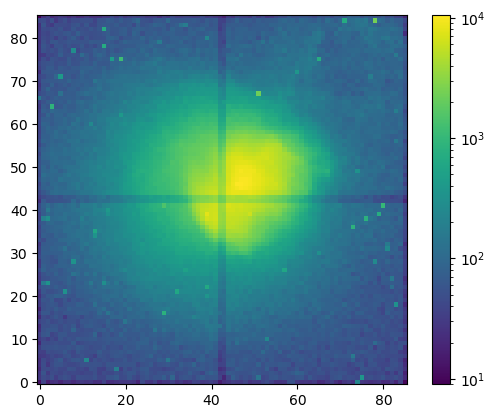

In [22]:
evts.bin_plot()

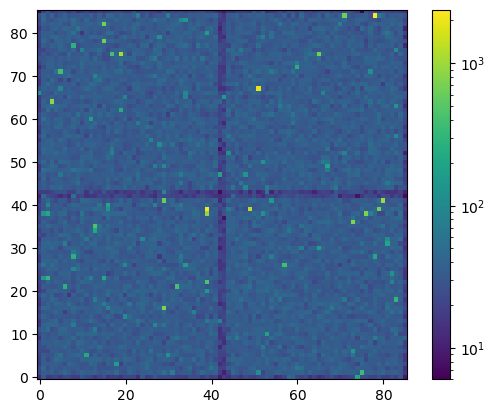

In [23]:
bg.bin_plot()

In [24]:
# mask.bin_plot()

In [25]:
ac = AnalysisConfig()
priors = [
    NormalPrior(Property.x, 0, 10),
    NormalPrior(Property.y, 0, 10),
    UniformPrior(Property.M_200, 1e14, 1e15),
    UniformPrior(Property.fg_200, 0.08, 0.24),
    DeltaPrior(Property.a_GNFW, 1.0620),
    DeltaPrior(Property.b_GNFW, 5.4807),
    DeltaPrior(Property.c_GNFW, 0.3292),
    DeltaPrior(Property.c500_GNFW, 1.156),
    DeltaPrior(Property.z, 0.160)
]

a = Analysis(dc, nfw_gnfw, priors, ac, label=test_id)

In [26]:
a.export_infile(path=f"data/{test_id}/infile_{test_id}.inp")

2023-05-08 19:31:52,078 | DEBUG : Written filBG: 'data/tng300s91h0-1/bg.txt' to infile
2023-05-08 19:31:52,079 | DEBUG : Written filevent: 'data/tng300s91h0-1/evts.txt' to infile
2023-05-08 19:31:52,079 | DEBUG : Written filARF: 'data/tng300s91h0-1/arf.txt' to infile
2023-05-08 19:31:52,079 | DEBUG : Written filRMF: 'data/tng300s91h0-1/rmf.txt' to infile
2023-05-08 19:31:52,080 | DEBUG : Written nx: 86 to infile
2023-05-08 19:31:52,080 | DEBUG : Written ny: 86 to infile
2023-05-08 19:31:52,080 | DEBUG : Written xrayNbin: 937 to infile
2023-05-08 19:31:52,080 | DEBUG : Written xrayNch: 460 to infile
2023-05-08 19:31:52,081 | DEBUG : Written xraycell: 11.808 to infile
2023-05-08 19:31:52,081 | DEBUG : Written xrayEmin: 0.3 to infile
2023-05-08 19:31:52,081 | DEBUG : Written xrayEmax: 7 to infile
2023-05-08 19:31:52,081 | DEBUG : Written sexpotime: 300000.0 to infile
2023-05-08 19:31:52,081 | DEBUG : Written bexpotime: 300000.0 to infile
2023-05-08 19:31:52,082 | DEBUG : Written Aeffave: 

PosixPath('data/tng300s91h0-1/infile_tng300s91h0-1.inp')